# Skillcraft

Starcraft is a Real Time Strategy (RTS) game developed by Blizzard that is played competitively.  There is a ranked system within the game that divides players into leagues (Bronze, Silver, Gold, Platinum, Diamond, Master and Grandmaster).  These have been indexed into 7 leagues from 1-7.  

The dataset can be obtained from here: https://www.kaggle.com/danofer/skillcraft

The goal of this notebook is to do an exploratory data analysis of the data as well as conduct some basic multinomial classification modelling on the data.

## Imports

Import useful libraries and the data itself.  

In [50]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn for naive-bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# random forest classifier
from sklearn.ensemble import RandomForestClassifier

# support vector machine
from sklearn import svm

In [33]:
starcraft = pd.read_csv("SkillCraft.csv")
starcraft.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


## Clean Up

Some checking to see if there exists any null data.  Clean up if there is.

In [15]:
# missing data check
starcraft.apply(lambda x: sum(x.isnull()), axis=0)

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

## Analysis

Visualizing and describing the dataset helps us to see if there are any features worth removing from the get-go before modelling itself.  It also helps to show if there is a correlation between the League a player is in and their stats.

### Summary Statistics

Basic overview of the data.

In [35]:
# dataset summary
starcraft.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4719.552127,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,2656.919630,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4788.000000,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,6994.750000,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### Feature Plotting

Boxplots give us a good idea of the distribution of features within each league and how they compare between leagues.

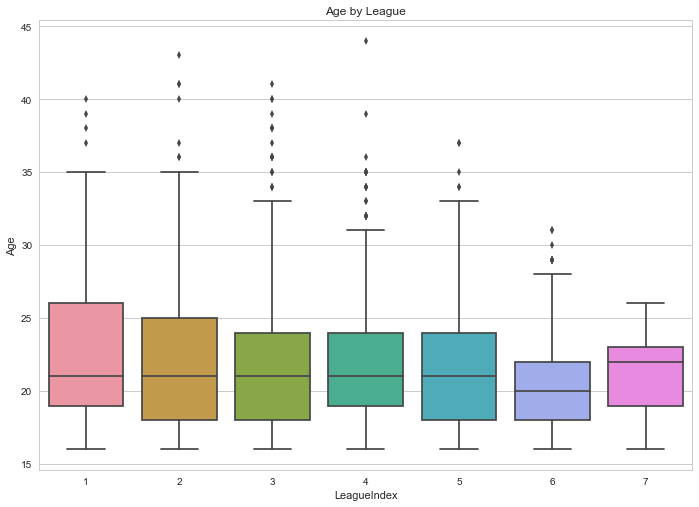

In [19]:
# Age by League
sns.set(style = "whitegrid", rc = {"figure.figsize":(11.7, 8.27)})
ax = sns.boxplot(x = "LeagueIndex", y = "Age", data = starcraft).set_title("Age by League")

Age has a fairly even distribution between leagues.

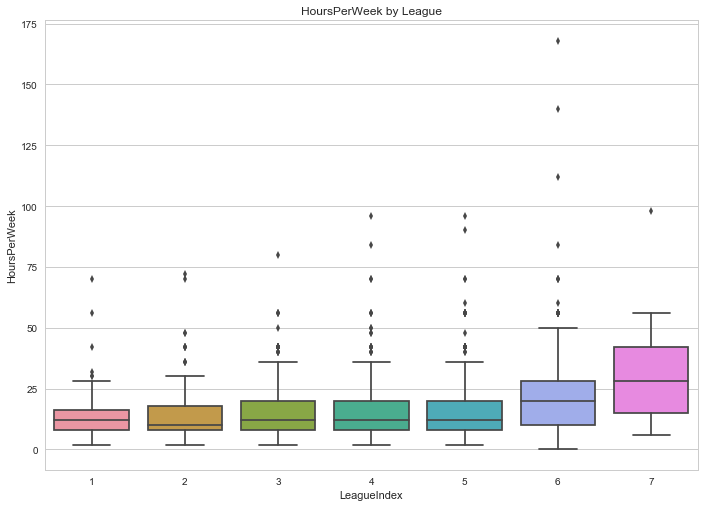

In [23]:
# HoursPerWeek by League
ax = sns.boxplot(x = "LeagueIndex", y = "HoursPerWeek", data = starcraft).set_title("HoursPerWeek by League")

Unsurprisngly, playing the game more results in a better league.  More practice.

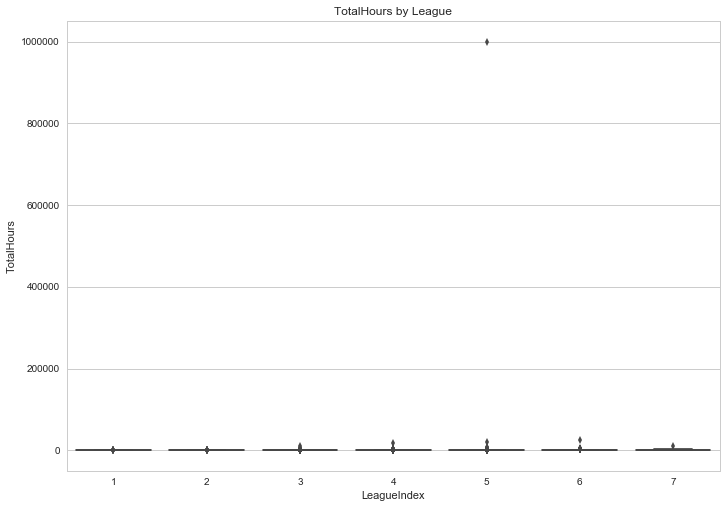

In [20]:
# TotalHours by League
ax = sns.boxplot(x = "LeagueIndex", y = "TotalHours", data = starcraft).set_title("TotalHours by League")

Total hours played by everyone appears to be about the same.  Makes sense when viewed from the lens of "work smarter, not harder".

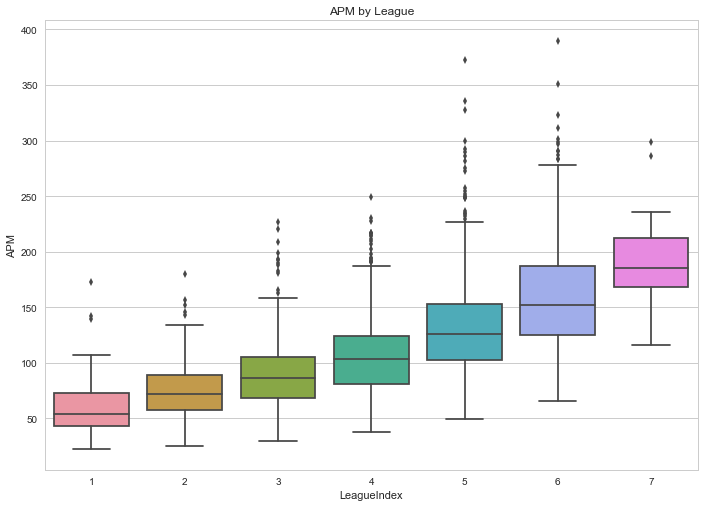

In [3]:
# APM per league
ax = sns.boxplot(x = "LeagueIndex", y = "APM", data = starcraft).set_title("APM by League")

Higher APM leads to higher league placement.  

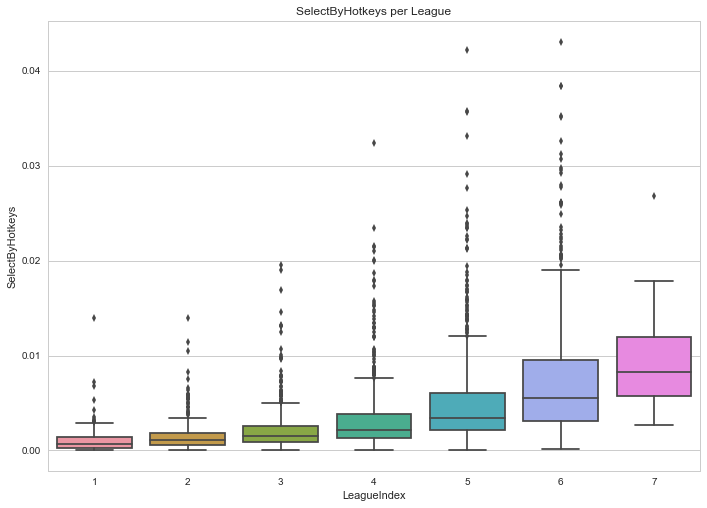

In [4]:
# SelectByHotkeys per league
ax = sns.boxplot(x = "LeagueIndex", y = "SelectByHotkeys", data = starcraft).set_title("SelectByHotkeys per League")

Selecting more things by hotkeys means more efficient movement since constantly clikcing the buttons instead of using hotkeys makes a player slower.

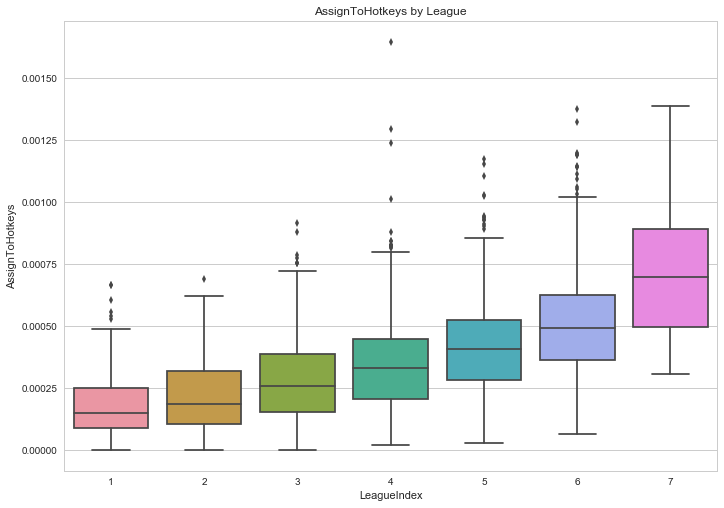

In [5]:
# AssignToHotkeys per League
ax = sns.boxplot(x = "LeagueIndex", y = "AssignToHotkeys", data = starcraft).set_title("AssignToHotkeys by League")

From starcraft guides, the "select all army" hotkey is most frequently used, leading to less hotkeys used overall.  More hotkeys, though, means better microing of your army.  Shows here as a higher leagues placement relative to number of hotkeys assigned.

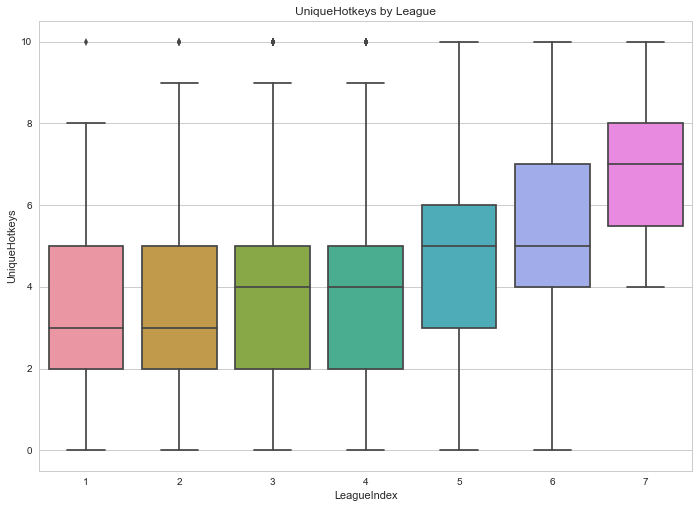

In [6]:
# UniqueHotkeys by League
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueHotkeys", data = starcraft).set_title("UniqueHotkeys by League")

The mean rises while the interquartile ranges stay about the same.

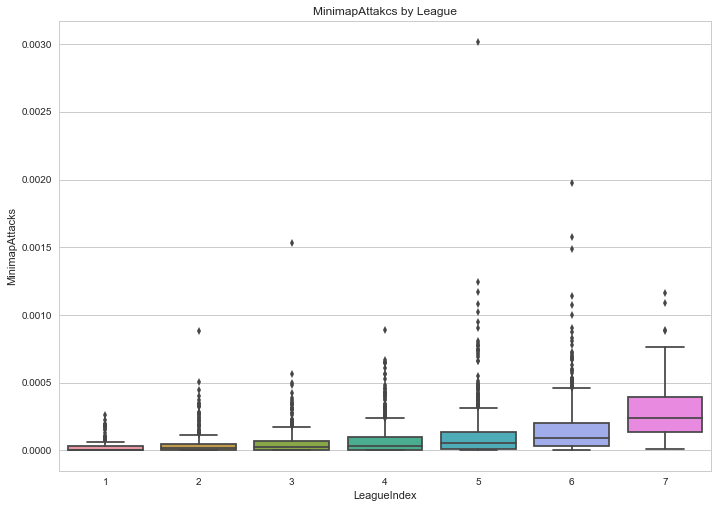

In [7]:
# MinimapAttacks by League
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapAttacks", data = starcraft).set_title("MinimapAttakcs by League")

Attacking by clicking on the minimap seems to increase with league.  Likely due to allowing a player to do other things while assigning their army to attack somewhere.

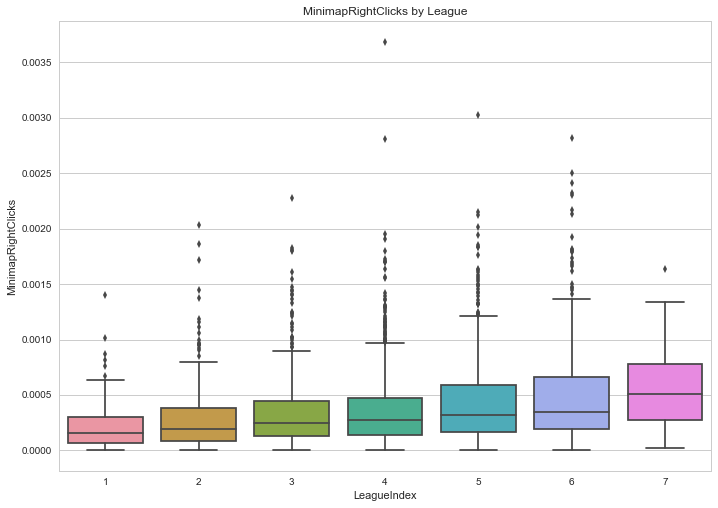

In [8]:
# MinimapRightClicks by League
ax = sns.boxplot(x = "LeagueIndex", y = "MinimapRightClicks", data = starcraft).set_title("MinimapRightClicks by League")

The right clicks allow for movement.  Again, more efficiency and multi-tasking allowed with this method.

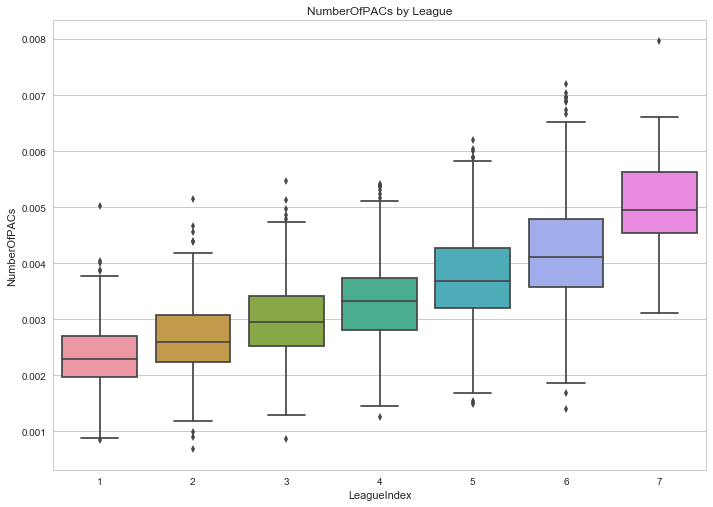

In [9]:
# NumberOfPACs by League
ax = sns.boxplot(x = "LeagueIndex", y = "NumberOfPACs", data = starcraft).set_title("NumberOfPACs by League")

Perception Action Cycle(PAC) or basically the ability to move the camera to an area, execute actions and then changes camera to another location.  Higher PACs means a shorter time to figure out what needs to be done in each area, leading to a higher league.

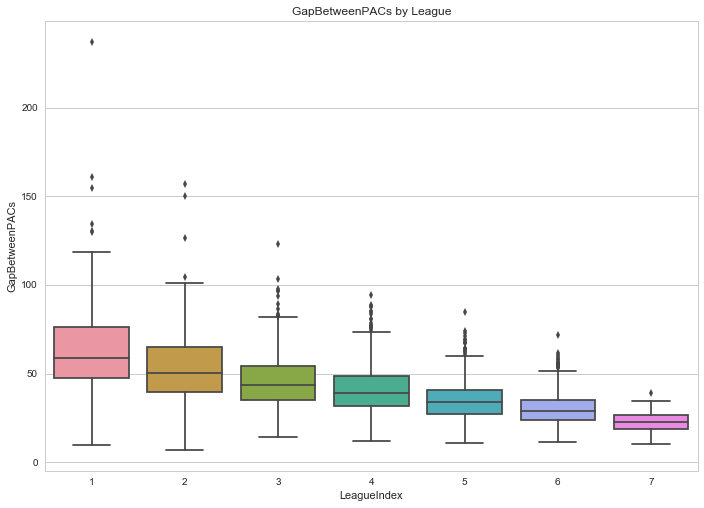

In [10]:
# GapBetweenPACs by League
ax = sns.boxplot(x = "LeagueIndex", y = "GapBetweenPACs", data = starcraft).set_title("GapBetweenPACs by League")

Shorter gaps means less time spent thinking about what to do and more time spent doing.  Shorter gap leads to a higher league.

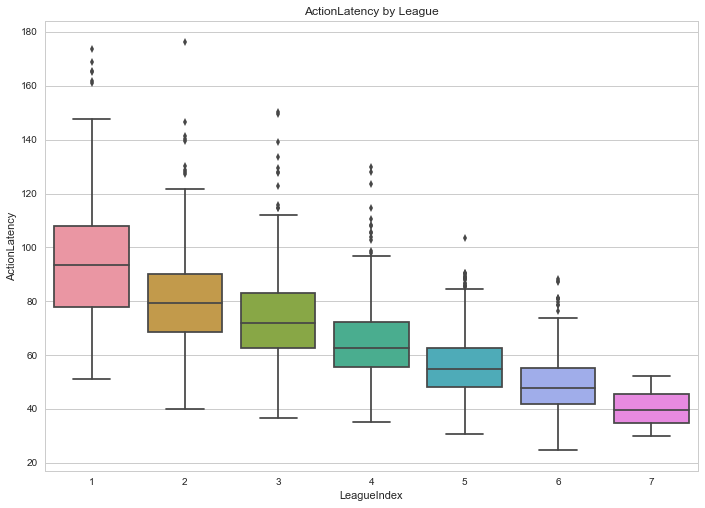

In [11]:
# ActionLatency by League
ax = sns.boxplot(x = "LeagueIndex", y = "ActionLatency", data = starcraft).set_title("ActionLatency by League")

The time required between moving camera to an area and then initiating an action.  Lower Action Latency likely means better understanding of the game/better muscle memory which leads to a higher league.

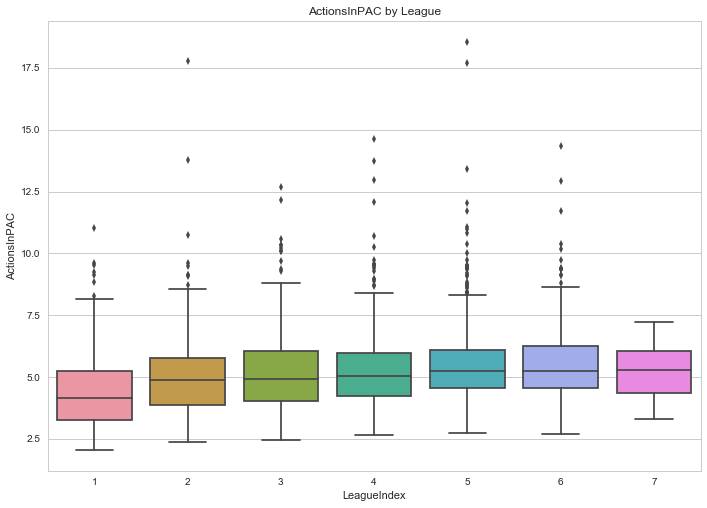

In [12]:
# ActionsInPAC by League
ax = sns.boxplot(x = "LeagueIndex", y = "ActionsInPAC", data = starcraft).set_title("ActionsInPAC by League")

Not much correlation with higher league likely due to it being more important to take less time to execute actions versus more actions on each screen.  

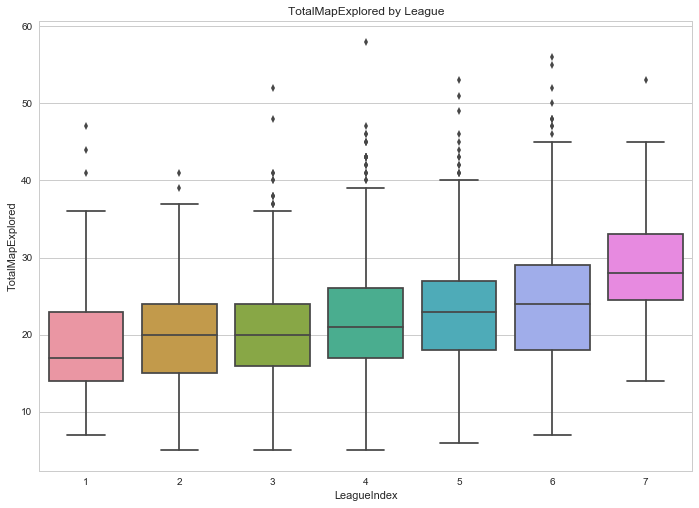

In [13]:
# TotalMapExplored by League
ax = sns.boxplot(x = "LeagueIndex", y = "TotalMapExplored", data = starcraft).set_title("TotalMapExplored by League")

More map explored leads to a higher league.  This is likely due to greater emphasis on scouting as the league increases.  If you don't know what your opponent is doing, then you won't be able to counter what they're doing.

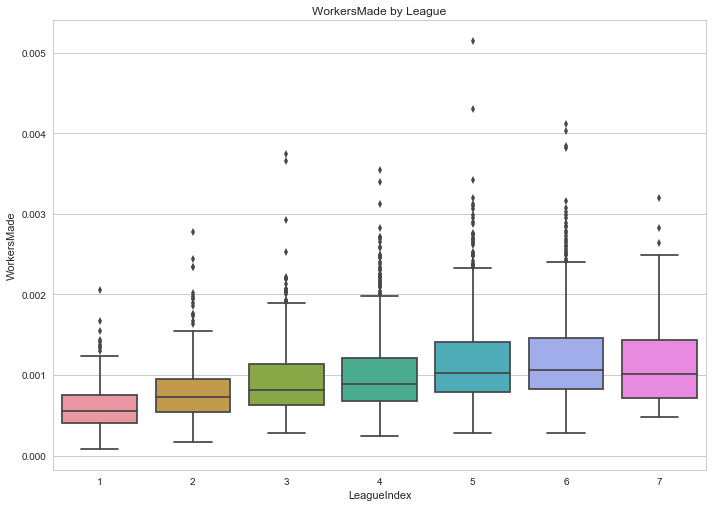

In [14]:
# WorkersMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "WorkersMade", data = starcraft).set_title("WorkersMade by League")

Consistent worker production leads to a higher league placement.  More workers means more mining and building so that makes pretty good sense.

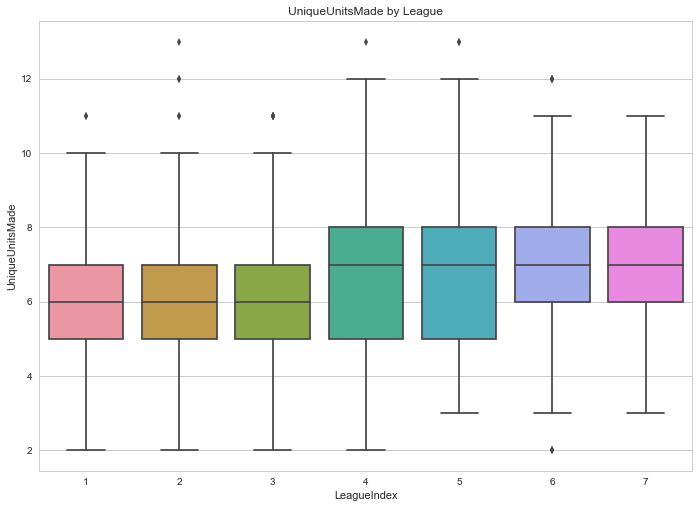

In [16]:
# UniqueUnitsMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "UniqueUnitsMade", data = starcraft).set_title("UniqueUnitsMade by League")

Not much correlation here.  There are only so many different units you can build for each race so there won't be a huge difference.

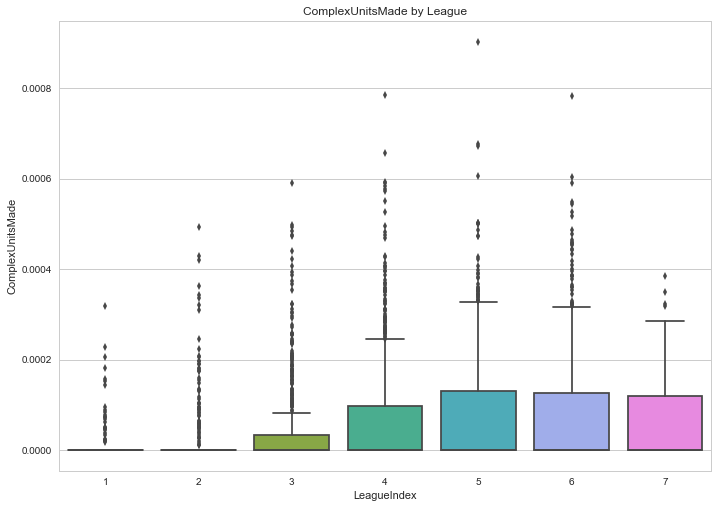

In [17]:
# ComplexUnitsMade by League
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexUnitsMade", data = starcraft).set_title("ComplexUnitsMade by League")

Complex units include ghosts, infestors and high templar.  Units that require greater skill than just A-clicking the ground with them given their abilities.  On the other hand, there's a greater range as the league increases but the mean number built stays at roughly the same, around 0.

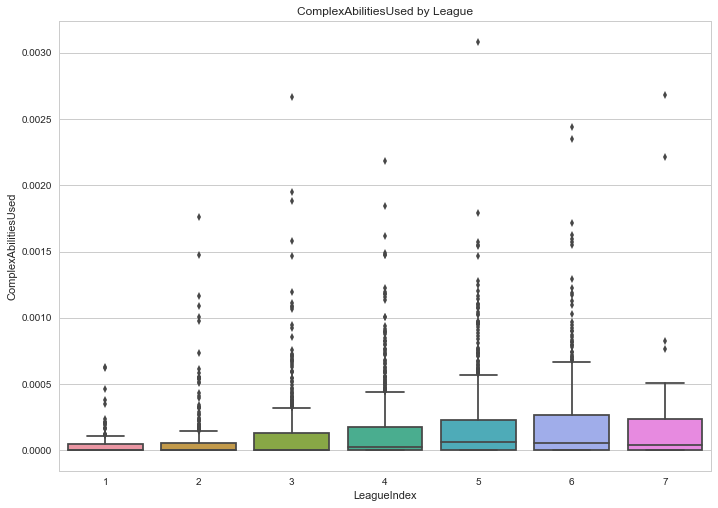

In [18]:
# ComplexAbilitiesUsed by League
ax = sns.boxplot(x = "LeagueIndex", y = "ComplexAbilitiesUsed", data = starcraft).set_title("ComplexAbilitiesUsed by League")

Also not a huge correlation.  Complex actions require extra input (like specific targetting) so the amount used increases with league, but not by a huge amount.

## Modelling

We can attempt to model the dataset.  Since there are 7 classes for targets, we are looking at a multinomial classification problem and can select our models accordingly.

### Naive Bayes Classification

A simple model for multinomial classification here.  We drop some columns as our analysis indicates that they will not have a suitable impact on the result.

In [24]:
# feature cleanup
drops = ["GameID", "Age", "TotalHours", "UniqueUnitsMade", "ComplexUnitsMade", "ComplexAbilitiesUsed"]

starcraft.drop(drops, axis = 1, inplace = True)
starcraft.head()

,LeagueIndex,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade
0,5,10,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397
1,5,10,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194
2,4,10,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745
3,3,20,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426
4,3,10,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174


We need to split the data into training and test sets to train and test the model respectively.

In [38]:
# split into training and test sets
y = starcraft.LeagueIndex
X_train, X_test, y_train, y_test = train_test_split(starcraft, y, test_size = 0.2)

# remove the target from the training data
X_train.drop("LeagueIndex", axis = 1, inplace = True)
X_test.drop("LeagueIndex", axis = 1, inplace = True)

# easy to read statements
print("X_train: ", X_train.shape) 
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape) 
print("y_test: ", y_test.shape)

X_train:  (2670, 19)
y_train:  (2670,)
X_test:  (668, 19)
y_test:  (668,)


C:\Users\AFKsi\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


And we can finally build the naive-bayes model.

In [40]:
# fit the model
clf = MultinomialNB()

# train the model
model_1 = clf.fit(X_train, y_train)

In [42]:
# predictions
predictions_1 = clf.predict(X_test)

# view predictions
predictions_1[:10]

array([7, 1, 2, 1, 7, 2, 7, 2, 4, 7], dtype=int64)

In [73]:
# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_1), 2))

Classification Accuracy:  0.18


The model classifies correctly about 18% of the time.  Not a very good result.

### Random Forest Classification

We can borrow the train and test data splits from the Naive Bayes Classification to run a random forest classifier.

In [47]:
# build the model
clf2 = RandomForestClassifier(n_estimators = 64, random_state = 123)

# fit the model
model_2 = clf2.fit(X_train, y_train)

In [48]:
# predictions
predictions_2 = clf2.predict(X_test)

# view them
predictions_2[:10]

array([6, 3, 2, 1, 6, 3, 3, 4, 4, 4], dtype=int64)

In [74]:
# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_2), 2))

Classification Accuracy:  0.37


Our random forest classifies correctly about 37% of the time.

### Support Vector Machine

In [69]:
# build the model
clf3 = svm.SVC(gamma = 0.00001, decision_function_shape = "ovr")

# fit the model
model_3 = clf3.fit(X_train, y_train)

In [72]:
# predictions
predictions_3 = clf3.predict(X_test)

predictions_3[:10]

array([5, 2, 3, 4, 5, 3, 4, 4, 4, 4], dtype=int64)

In [75]:
# compare results
print("Classification Accuracy: ", round(accuracy_score(y_test, predictions_3), 2))

Classification Accuracy:  0.3


Our support vector machine classifies correctly about 30% of the time.

## Conclusions

The models explored here are fairly simple, especially considering the lack of feature engineering (outside of removing some columns) to make the features better explain variance in the data.  For better classification, more feature engineering is likely required as well as hyperparameter tuning to attain a better classification rate.